# 双峰法图像二值化

In [2]:
#coding:utf-8
import numpy
import numpy as np
from numpy.lib.function_base import histogram

# import numpy.histogram
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame


In [3]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [8]:
def peaksh_histogram_segment(src):
    dst = np.zeros_like(src)
    h1 = 0
    h2 = 0
    t1 = 0
    t2 = 0
    t = 255
    
    histValues,_ = histogram(src.flatten(),256,normed=True)
    for i in range(256):
        if i < 129:
            if histValues[i] > t1:
                h1 = i
                t1 = histValues[i]
        else:
            if histValues[i] > t2:
                h2 = i
                t2 = histValues[i]
    Th = 0
    for i in range(h1,h2):
        if histValues[i] < t:
            Th = i
            t = histValues[i]
    idx = (src < Th)
    dst[idx] = 0
    dst[~idx] = 255
    return dst,Th

In [9]:
dst,th = peaksh_histogram_segment(gray)
print('Threshold:',th)

Threshold: 109


Text(0.5,1,'Peak Threshold')

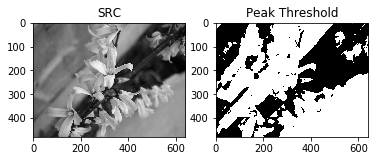

In [10]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Peak Threshold')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45169083